# Assignment 3: Reinforcement Learning Pipeline in Practice


*CS260R 2023Fall: Reinforcement Learning. Department of Computer Science at University of California, Los Angeles.
Course Instructor: Professor Bolei ZHOU. Assignment author: Zhenghao PENG.*

-----


## Demo 1: Setup dependencies

In [11]:
!pip install torch

# Install MetaDrive, a lightweight driving simulator
!pip install git+https://github.com/metadriverse/metadrive

# Test whether MetaDrive is properly installed. No error means the test is passed.
!python -m metadrive.examples.profile_metadrive --num-steps 100

!pip install pandas scipy seaborn tabulate pyyaml

# Update(2022-11-03): Fix pyglet compatability issue since it is updated to 2.0.0 recently.
!pip install "pyglet<2.0.0"

  Cloning https://github.com/metadriverse/metadrive to c:\users\user\appdata\local\temp\pip-req-build-xj_3uf8j
  Resolved https://github.com/metadriverse/metadrive to commit 1429251b0a21cbffafcb36d63bead73fa4773a6c
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'


  Running command git clone --filter=blob:none --quiet https://github.com/metadriverse/metadrive 'C:\Users\User\AppData\Local\Temp\pip-req-build-xj_3uf8j'


Start to profile the efficiency of MetaDrive with 1000 maps and ~4 vehicles!
Finish 100/100 simulation steps. Time elapse: 0.1491. Average FPS: 670.6090, Average number of vehicles: 4.0000
Total Time Elapse: 0.149, average FPS: 670.609, average number of vehicles: 4.000.


[INFO] MetaDrive version: 0.4.1.2
[INFO] Sensors: [lidar: Lidar(50,), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[INFO] Assets version: 0.4.1.2


In [12]:
import os
try:
    
    from google.colab import drive
    drive.mount('/content/gdrive')

    DRIVE_PATH = '/content/gdrive/My\ Drive/cs269'
    DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
    if not os.path.exists(DRIVE_PYTHON_PATH):
      %mkdir $DRIVE_PATH

    ## the space in `My Drive` causes some issues,
    ## make a symlink to avoid this
    SYM_PATH = '/content/cs269'
    if not os.path.exists(SYM_PATH):
      !ln -s $DRIVE_PATH $SYM_PATH
    
    running_in_colab = True
    
    # We already mounted in our google drive.
    # Enter the foler where you put files in:
    %cd '/content/cs269'

    # Current working directory:
    !pwd

    # What files are there:
    !ls
   
    
except ModuleNotFoundError:
    running_in_colab = False
    print(
        "I guess you are running locally. If you get this message in Colab, check the files."
    )


I guess you are running locally. If you get this message in Colab, check the files.


## Demo 2: Train a TD3 agent

Spinning Up tutorial provides great explaination on TD3 algorithm:
https://spinningup.openai.com/en/latest/algorithms/td3.html

Please implement all TODOs in `core/td3_trainer.py` and `train_td3.py`.

### Demo 2.1: Train TD3 agent in Pendulum-v1

In [13]:
!python train_td3.py \
--env-id Pendulum-v1 \
--log-dir Pendulum-v1 \
--max-steps 50000 \
--start-steps 1000 \
--lr 1e-3

c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core

 ===== TD3 Training Step 1199 =====:
  actor_loss: 8.063425064086914
  critic_loss: 1.0202257633209229
  current_q1: -8.268160820007324
  current_q2: -8.224113464355469
  episode_reward: -1099.9589413847373
  frame_per_second: 353
  log_dir: Pendulum-v1
  reward: -5.728486061096191
  target_q: -8.271041870117188
  total_episodes: 6
  total_steps: 1199
  total_time: 3.3889143466949463

Trainer is saved at <Pendulum-v1\td3>. Progress is saved at <Pendulum-v1\td3\progress.csv>.

 ===== TD3 Training Step 2199 =====:
  actor_loss: 21.88340187072754
  critic_loss: 2.52944016456604
  current_q1: -21.89398956298828
  current_q2: -22.018632888793945
  episode_reward: -1300.0868551232036
  frame_per_second: 108
  log_dir: Pendulum-v1
  reward: -6.66810417175293
  target_q: -22.056514739990234
  total_episodes: 11
  total_steps: 2199
  total_time: 20.202754497528076


 ===== TD3 Training Step 3199 =====:



Training Step: 100%|██████████| 50000/50000 [15:48<00:00, 52.72it/s]


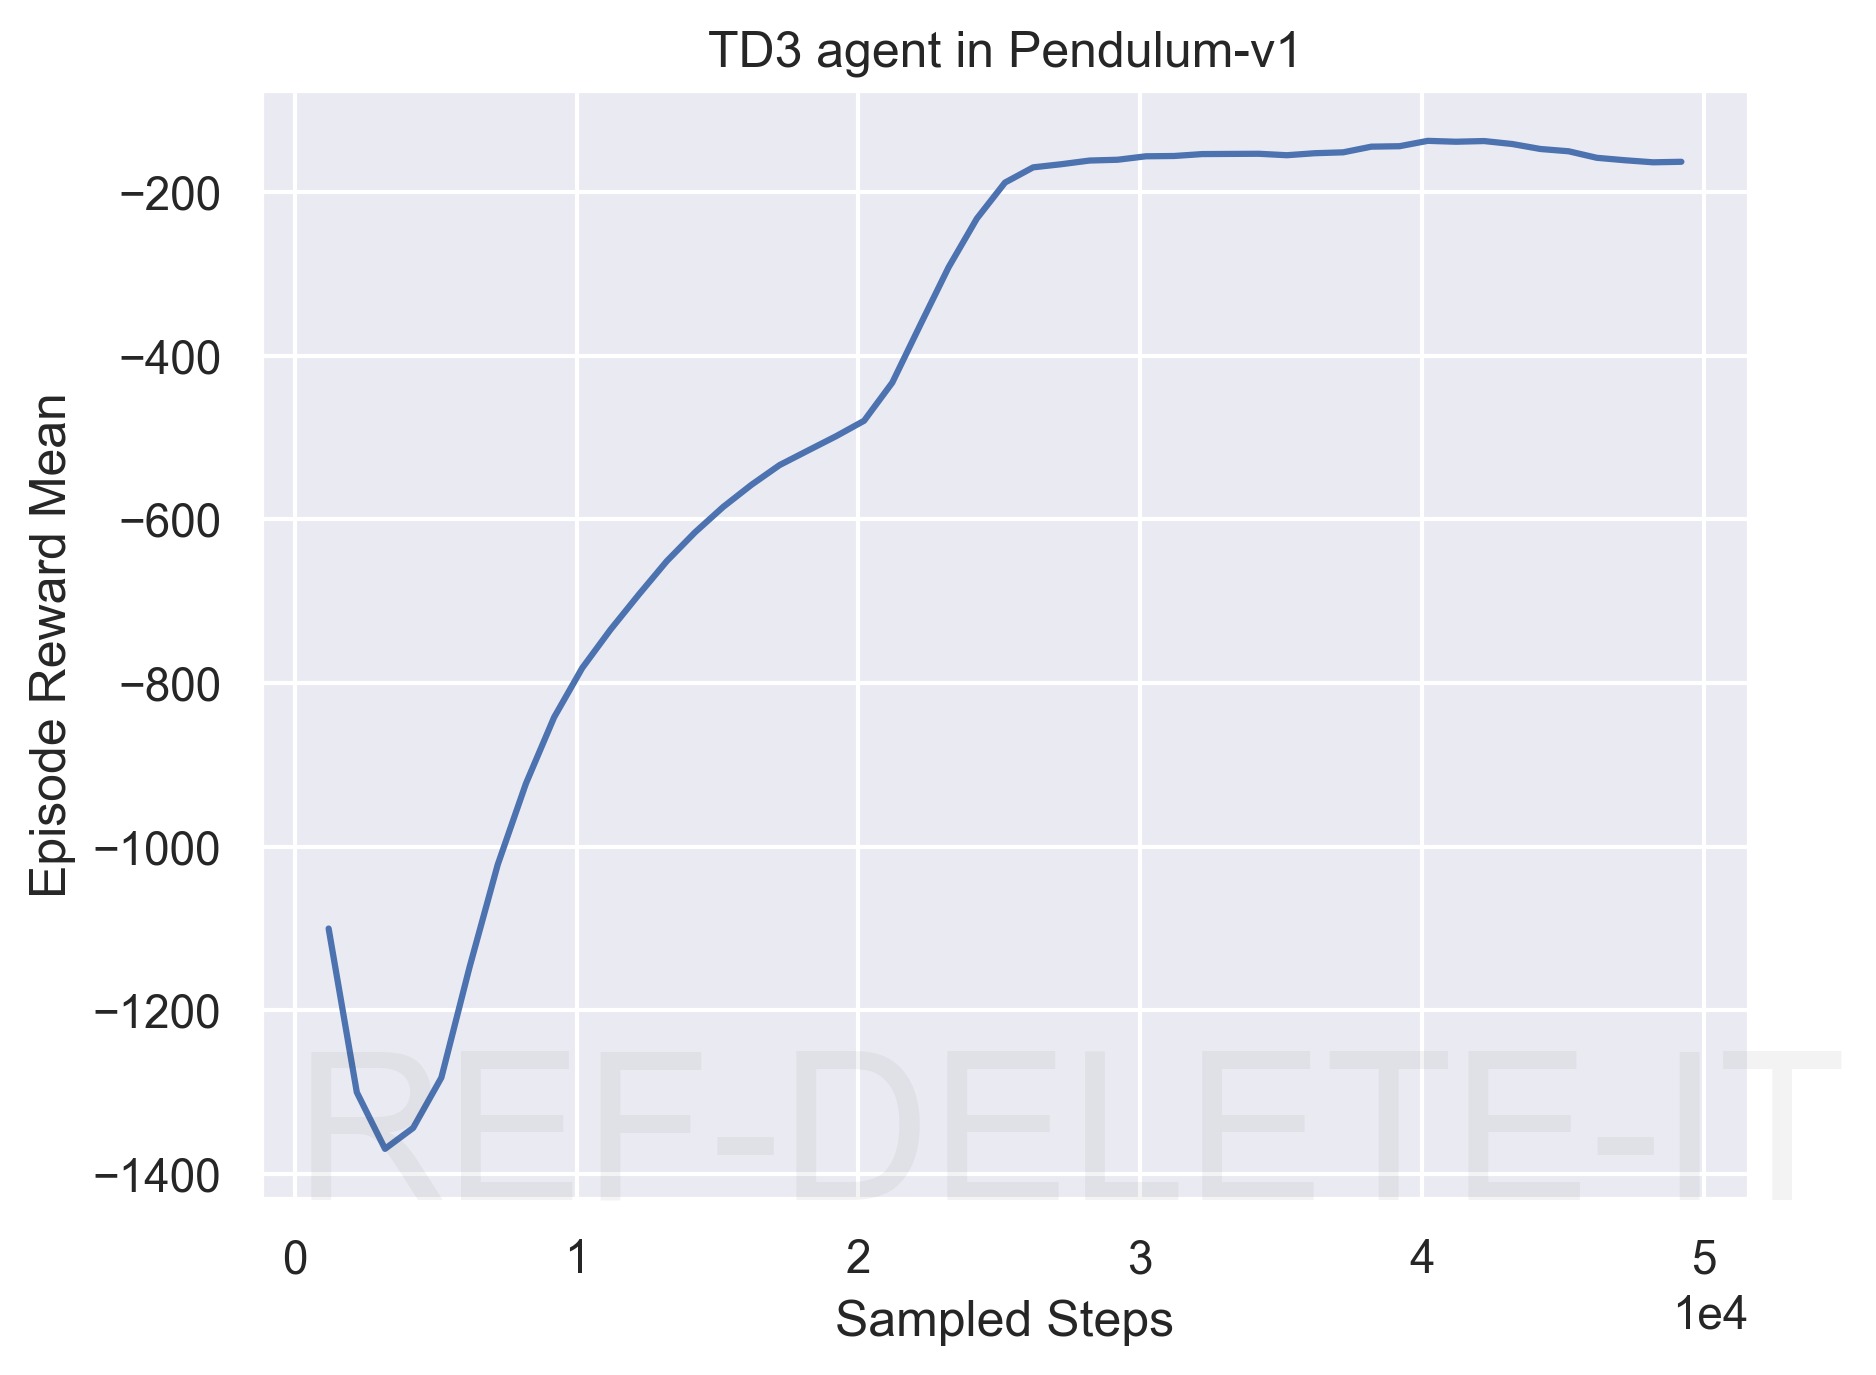

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("Pendulum-v1/td3/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in Pendulum-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# TODO: You should remove this line in your code.
ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('pendulum-td3.png', format='png', dpi=300, bbox_inches="tight")


### Demo 2.2: Train TD3 agent in MetaDrive-Tut-Hard-v0


In [1]:
!python train_td3.py \
--env-id MetaDrive-Tut-Hard-v0 \
--log-dir MetaDrive-Tut-Hard-v0 \
--max-steps 100_000


c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Trainer is saved at <MetaDrive-Tut-Hard-v0\td3>. Progress is saved at <MetaDrive-Tut-Hard-v0\td3\progress.csv>.

 ===== TD3 Training Step 2001 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_reward: 10.981612480168124
  frame_per_second: 255
  log_dir: MetaDrive-Tut-Hard-v0
  success_rate: 0.0
  target_q: .nan
  total_episodes: 2
  total_steps: 2001
  total_time: 7.839827060699463


 ===== TD3 Training Step 3002 =====:
  actor_loss: .nan
  critic_loss: .nan
  episode_reward: 10.976808857141393
  frame_per_second: 287
  log_dir: MetaDrive-Tut-Hard-v0
  success_rate: 0.0
  target_q: .nan
  total_episodes: 3
  total

[INFO] MetaDrive version: 0.4.1.2
[INFO] Sensors: [lidar: Lidar(50,), side_detector: SideDetector(), lane_line_detector: LaneLineDetector()]
[INFO] Render Mode: none
[WARNING] environment_num is deprecated. Use num_scenarios instead! (metadrive_env.py:119)
[INFO] Assets version: 0.4.1.2

Training Step:   1%|          | 984/100000 [00:03<08:50, 186.53it/s][INFO] Episode ended! Scenario Index: 1015 Reason: max step 

Training Step:   2%|▏         | 1957/100000 [00:06<03:13, 505.55it/s][INFO] Episode ended! Scenario Index: 1000 Reason: max step 

Training Step:   3%|▎         | 2988/100000 [00:10<03:20, 484.34it/s][INFO] Episode ended! Scenario Index: 1001 Reason: max step 

Training Step:   3%|▎         | 3337/100000 [00:11<03:18, 488.14it/s][INFO] Episode ended! Scenario Index: 1001 Reason: out_of_road.

Training Step:   4%|▍         | 4351/100000 [00:13<03:49, 417.39it/s][INFO] Episode ended! Scenario Index: 1000 Reason: max step 

Training Step:   5%|▍         | 4970/100000 [00:15<04:

The log contains these keys:  Index(['Unnamed: 0', 'log_dir', 'frame_per_second', 'episode_reward',
       'total_steps', 'total_episodes', 'total_time', 'target_q', 'actor_loss',
       'critic_loss', 'success_rate', 'current_q1', 'current_q2', 'reward'],
      dtype='object')


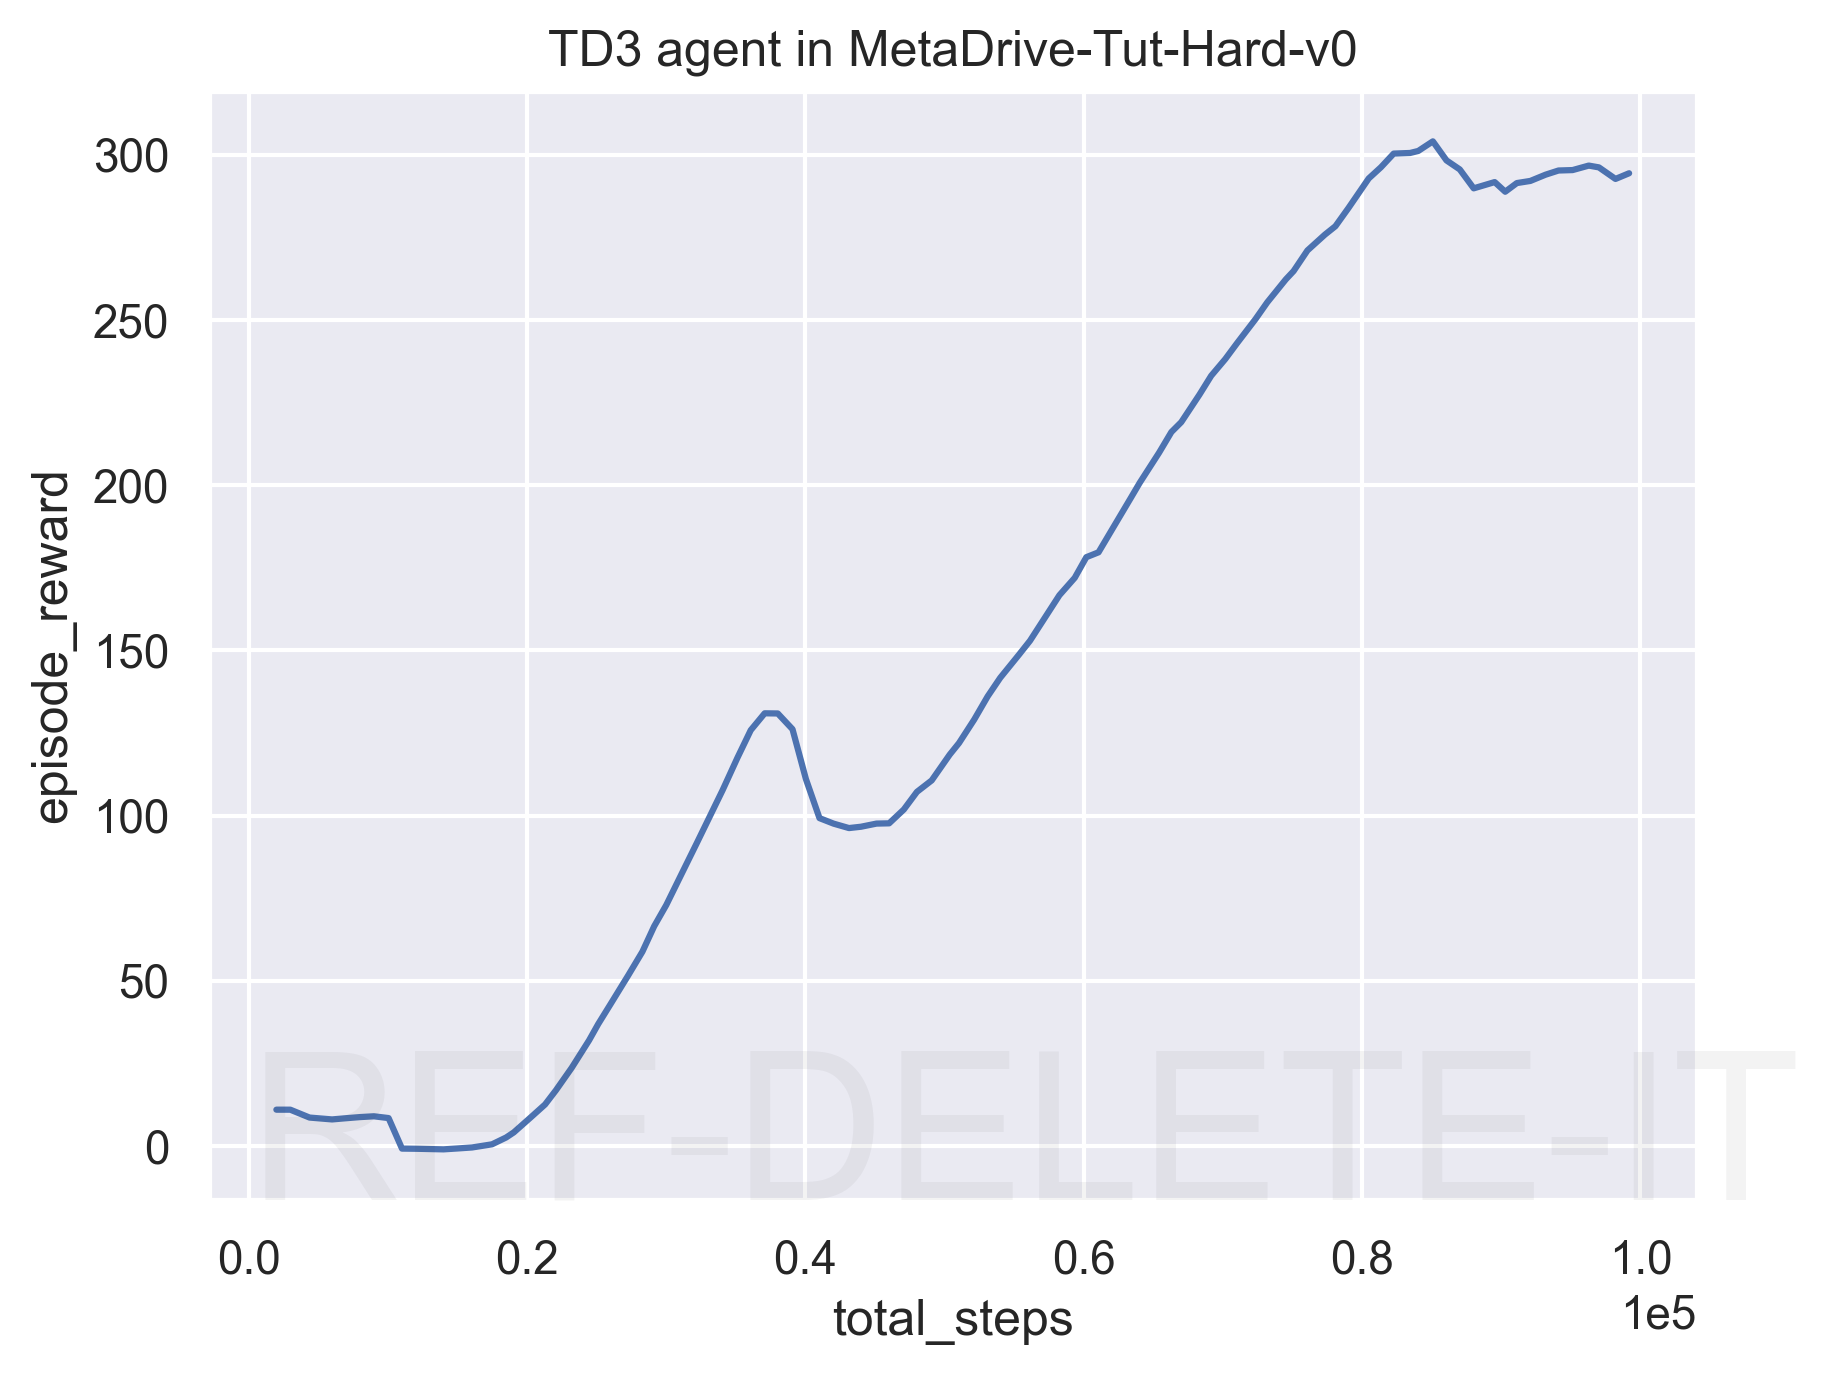

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

progress = pd.read_csv("MetaDrive-Tut-Hard-v0/td3/progress.csv")
print("The log contains these keys: ", progress.keys())
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("TD3 agent in MetaDrive-Tut-Hard-v0")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

# TODO: Remove this line in your code.
ax.annotate("REF-DELETE-IT", (0, ax.get_ylim()[0]), size=50, alpha=0.05)

plt.savefig('metadrive-hard-td3.png', format='png', dpi=300, bbox_inches="tight")


## Demo 3: Train a PPO agent

You need to finish `core/ppo_trainer.py`, `core/buffer.py` and `train_ppo.py`.

Here we use GAE [1] (Generalized Advantage Estimation) to estimate the advantage. This technique is implemented in `PPORolloutStorage.compute_returns` in `core/buffer.py`. Concretely, we estimate the advantage of current state $t$ via:

$$\delta_t = r_t + \gamma V(s_{t+1}) - V(s_t)$$

$$A^{GAE}_t = \sum_{l=0}^{\infty} (\gamma \lambda) ^ l \delta_{t+l}$$

wherein $V$ is the state value function, $\lambda$ is a hyper-parameter defined in `PPOConfig["gae_lambda"]`.

You can find that when $\lambda = 0$, the GAE estimates advantage in an one-step TD manner. When $\lambda = 1$, the GAE reduces to Monte Carlo Estimation of the state value. Therefore by varying the $\lambda$, we can adjust the trade-off between the accuracy of the estimation (bias) and the variance of advantage.

[1]: Schulman, John , et al. "High-Dimensional Continuous Control Using Generalized Advantage Estimation." (2015).

### Demo 3.1 Train and draw the learning curve of PPO in CartPole

In [17]:
!python train_ppo.py \
--env-id CartPole-v1 \
--log-dir CartPole-v1 \
--num-envs 10 \
--max-steps 300000

c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
Start training!
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignmen


100%|██████████| 300000/300000 [03:12<00:00, 1585.30it/s]
320000it [03:24, 1594.99it/s]                            
320000it [03:24, 1562.47it/s]


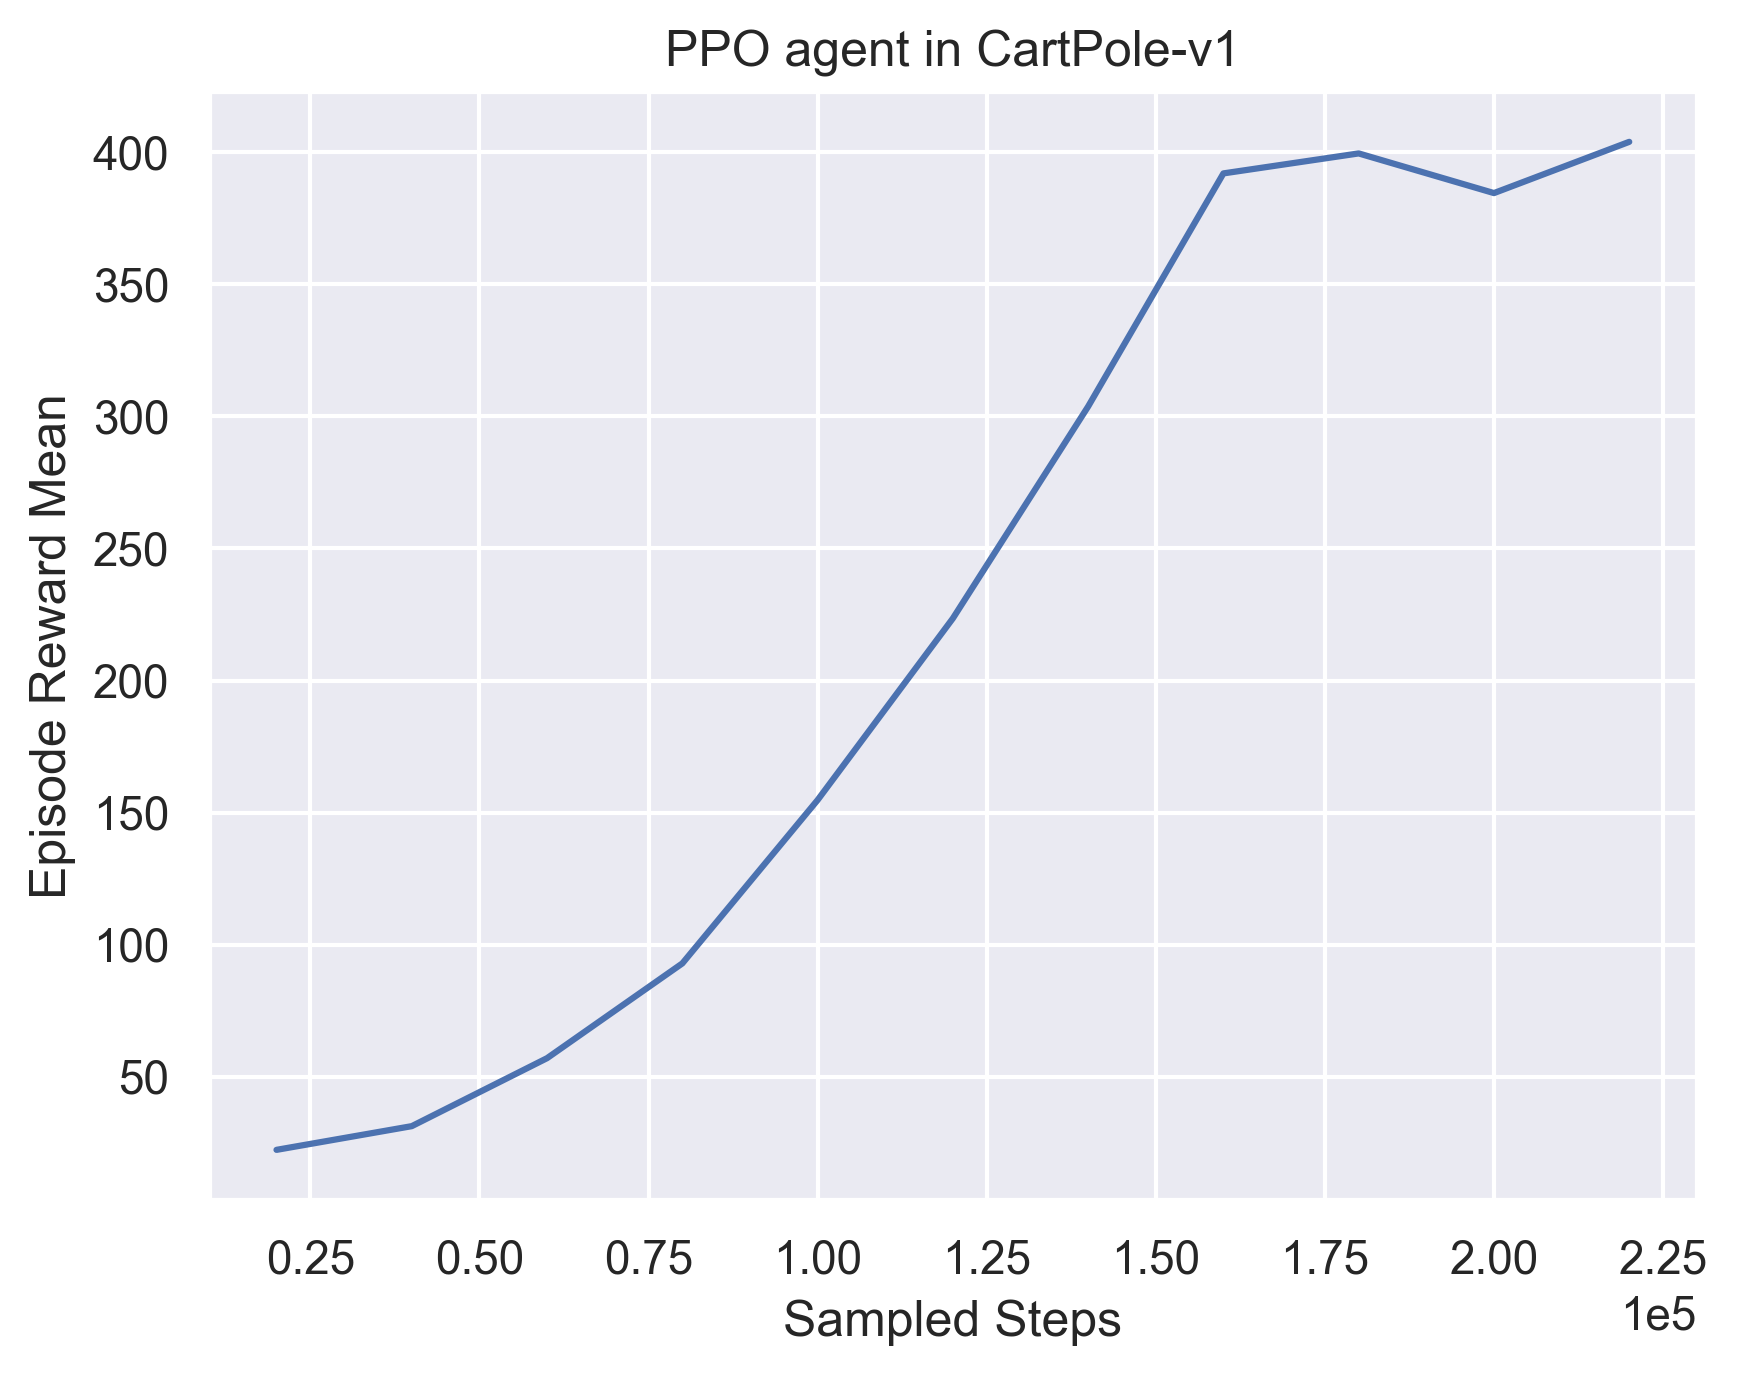

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("CartPole-v1/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in CartPole-v1")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

# You should remove this line in your code:

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('cartpole-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Demo 3.2: Train and play with the PPO agent in MetaDrive Hard Env.

In [1]:
!python train_ppo.py \
  --env-id MetaDrive-Tut-Hard-v0 \
  --log-dir MetaDrive-Tut-Hard-v0 \
  --num-envs 10 \
  --max-steps 1_000_000

^C


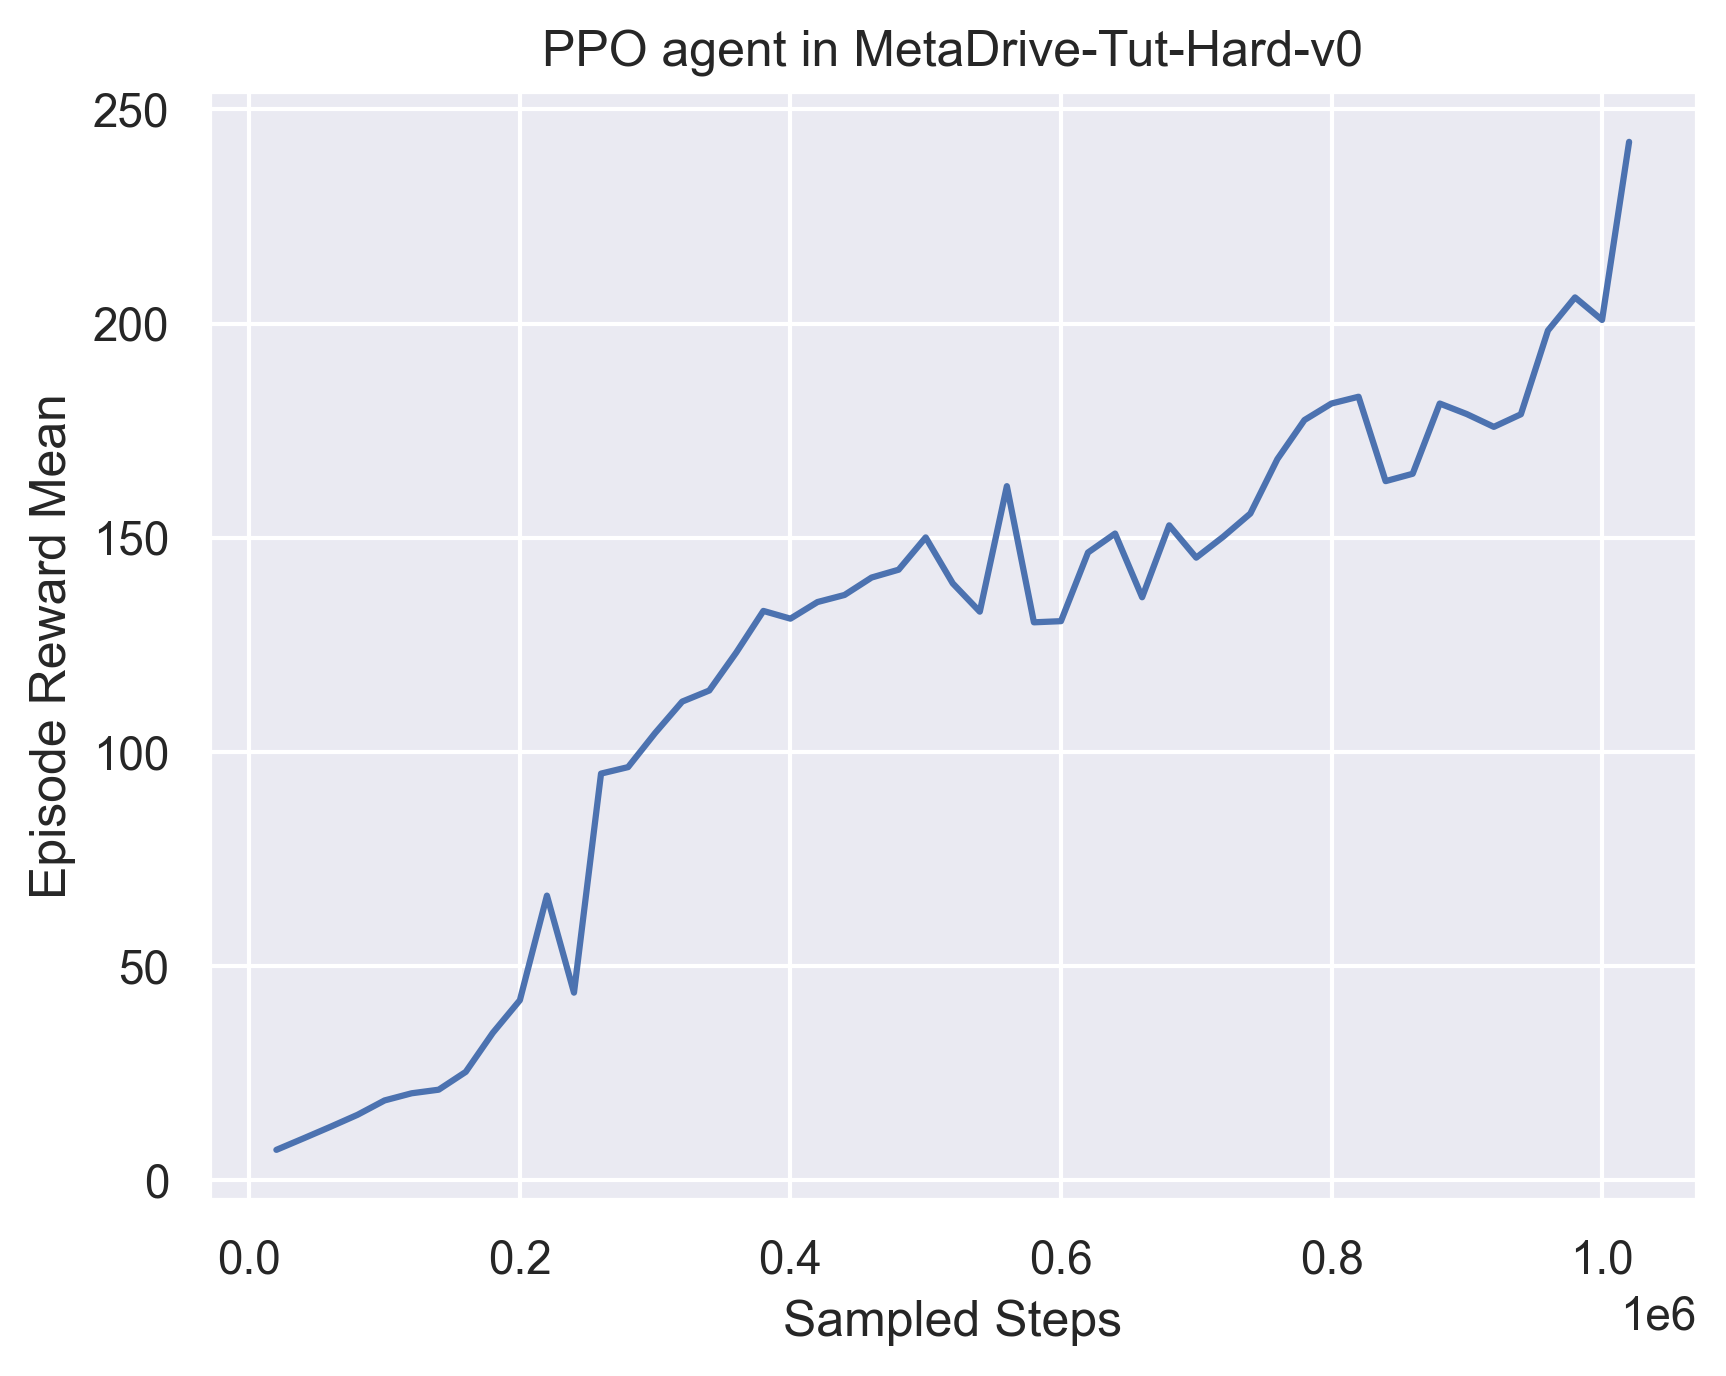

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

ppo_progress = pd.read_csv("MetaDrive-Tut-Hard-v0/ppo/progress.csv")
plt.figure(dpi=300)
sns.set("notebook", "darkgrid")
ax = sns.lineplot(
    data=ppo_progress,
    x="total_steps",
    y="episode_reward"
)
ax.set_title("PPO agent in MetaDrive-Tut-Hard-v0")
ax.set_ylabel("Episode Reward Mean")
ax.set_xlabel("Sampled Steps")

ax.ticklabel_format(style='sci', scilimits=(0,0), axis='x')

plt.savefig('metadrive-hard-ppo.png', format='png', dpi=300, bbox_inches="tight")


### Visualize the performance of PPO in MetaDrive Hard Env.

You might have different maps in your visualization, that's expected. You don't need to submit the video to anywhere.

In [22]:
# Load the agent using PolicyAPI (easy to use interface to get policy)

from core.envs import make_envs
import gymnasium as gym
from vis import PPOPolicy, evaluate, animate
import pygame

env_name = "MetaDrive-Tut-Hard-v0"
policy = PPOPolicy(
    env_name,  # In order to get the observation shape
    num_envs=1, 
    log_dir="MetaDrive-Tut-Hard-v0/ppo/",
    suffix="final"
)

# Render the learned behavior
# NOTE: The learned agent is marked by green color.
eval_reward, eval_info = evaluate(
    policy=policy, 
    num_episodes=1, 
    env_name=env_name,
    render="topdown",  # Visualize the behaviors in top-down view
    verbose=True
)

frames = [pygame.surfarray.array3d(f).swapaxes(0, 1) for f in eval_info["frames"]]

# animate(frames)

print("PPO agent achieves {} return in MetaDrive Hard environment.".format(eval_reward))

c:\Python310\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Python310\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Hard-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Python310\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-1Env-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Python310\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-5Env-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Python310\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Ov

Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Successfully load weights from C:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\MetaDrive-Tut-Hard-v0\ppo\checkpoint-final.pkl!
Evaluating 1/1 episodes. We are in 1/1000 steps. Current episode reward: 0.000
Evaluating 1/1 episodes. We are in 51/1000 steps. Current episode reward: 25.134
Evaluating 1/1 episodes. We are in 101/1000 steps. Current episode reward: 71.840
Evaluating 1/1 episodes. We are in 151/1000 steps. Current episode reward: 120.163
Evaluating 1/1 episodes. We are in 201/1000 steps. Current episode reward: 159.489
Evaluating 1/1 episodes. We are in 251/1000 steps. Current episode reward: 203.217
Evaluating 1/1 episodes. We are in 301/1000 steps. Current epis

## Demo 5: Generalization Experiments

Here we draw the figures of generalization experiments. You can always find that when training in the environment with only one sceanrio, the test performance is poor.

Due to computing resource limit, we do not require you train the agent in the same environment for multiple time. However, this leads to huge instability in the performance and the curves do not look reasonable as it is in the paper. Repeating multiple times of experiments with different random seeds can relieve this issue.

We provide `train_[ppo|td3].py`, `eval_[ppo|td3].py`, `[ppo|td3]_generalization_train.sh` and `[ppo|td3]_generalization_eval.sh`. You can refer to them for more information.

You only need to pick one algorithm and run the generalization experiments. See `result.md` for more details.


References:

The Figure 8 in [MetaDrive paper](https://arxiv.org/pdf/2109.12674.pdf).

The Figure 2 in [ProcGen paper](http://proceedings.mlr.press/v97/cobbe19a/cobbe19a.pdf).



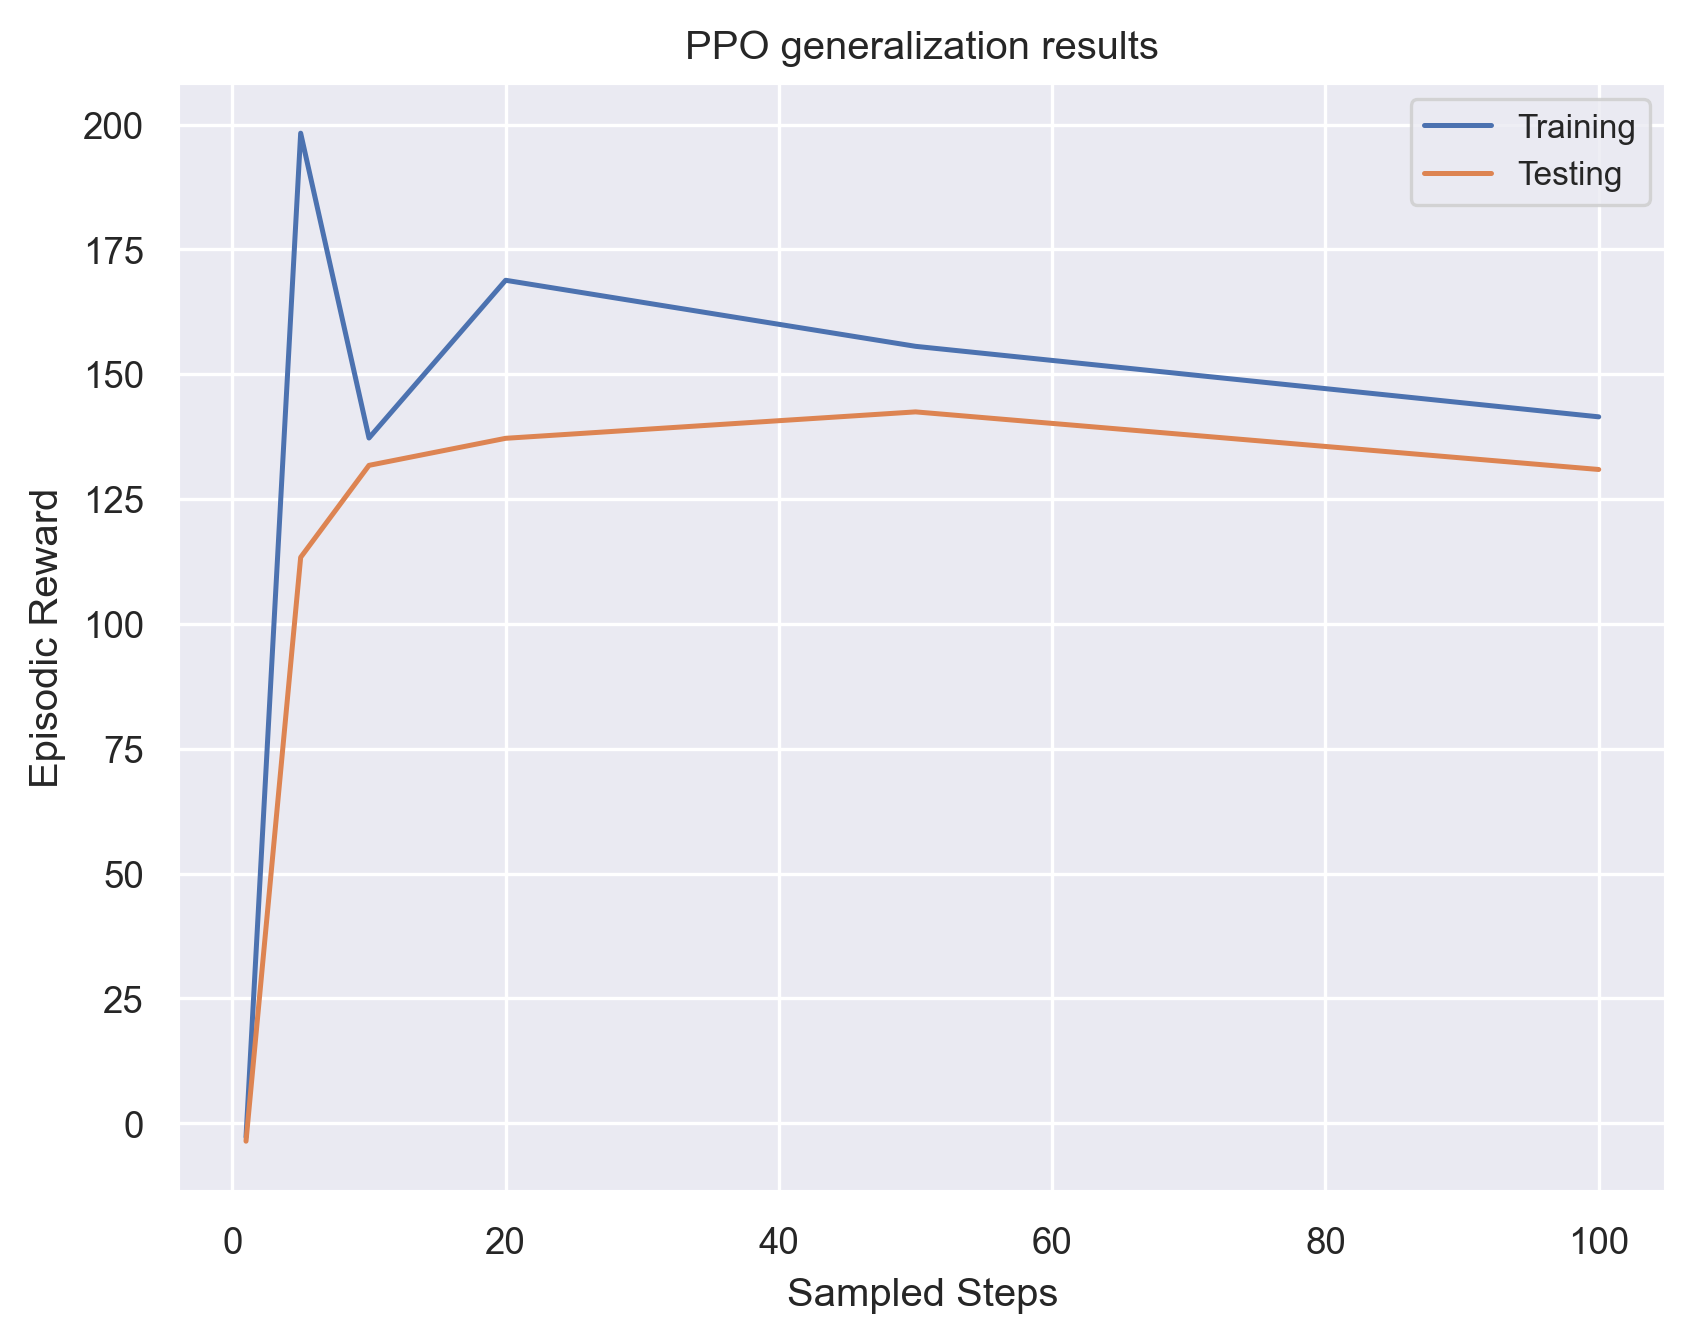

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5, 10, 20, 50, 100]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/ppo/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/ppo/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("PPO generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Sampled Steps")
ax.legend(fontsize=8, loc="upper right")


# Note: The following figure is for reference used only, you don't need to repreduce it.
plt.savefig('metadrive-generalization-ppo.png', format='png', dpi=300, bbox_inches="tight")

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

y="training_episode_reward/episode_reward_mean"
# y="success_rate/success_rate_mean"
# y="learning_stats/entropy"
# y = "total_episodes"


plot_data = []

for env_num in [1, 5]:
    df = pd.read_csv("MetaDrive-Tut-{}Env-v0/td3/progress.csv".format(env_num))
    
    plot_data.append(dict(
        value=df.iloc[-1]["episode_reward"],
        env_num=env_num,
        label="Training"
    ))
    
    eval_df = pd.read_csv("MetaDrive-Tut-{}Env-v0/td3/eval_results.csv".format(env_num))
    
    plot_data.append(dict(
        value=eval_df["rewards"].mean(),
        env_num=env_num,
        label="Testing"
    ))
plot_data = pd.DataFrame(plot_data)
    

# df = pd.concat(dfs)
# df = df.reset_index()

plt.figure(dpi=300)
sns.set("paper", "darkgrid")
ax = sns.lineplot(
    data=plot_data,
    hue="label",
    x="env_num",
    y="value"
)
ax.set_title("TD3 generalization results")
ax.set_ylabel("Episodic Reward")
ax.set_xlabel("Sampled Steps")
ax.legend(fontsize=8, loc="upper right")

# Note: The following figure is for reference used only, you don't need to repreduce it.

You can run script in this notebook.

In [ ]:
!python eval_ppo.py --log-dir MetaDrive-Tut-Easy-v0/ppo --num-envs 2

c:\Python310\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Easy-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Python310\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-Hard-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Python310\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-1Env-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Python310\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Overriding environment MetaDrive-Tut-5Env-v0 already in registry.
  logger.warn(f"Overriding environment {new_spec.id} already in registry.")
c:\Python310\lib\site-packages\gymnasium\envs\registration.py:693: UserWarning: WARN: Ov

c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
c:\Users\User\Documents\School\2023 Fall\CS260R\cs260r-assignment-2023fall\assignment3\core
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']
Successfully registered MetaDrive environments:  ['MetaDrive-Tut-Easy-v0', 'MetaDrive-Tut-Hard-v0', 'MetaDrive-Tut-1Env-v0', 'MetaDrive-Tut-5Env-v0', 'MetaDrive-Tut-10Env-v0', 'MetaDrive-Tut-20Env-v0', 'MetaDrive-Tut-50Env-v0', 'MetaDrive-Tut-100Env-v0', 'MetaDrive-Tut-Test-v0']


In [ ]:
!python eval_gail.py --log-dir MetaDrive-Tut-Easy-v0/gail --num-envs 2 --num-episodes 5